In [83]:
#importing libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import math
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()

In [84]:
# setting the period of analysis
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)
ticker = 'TCS'

In [85]:
# function to fetch data from yahoo_finance

# def get_data(ticker):
#   asset = pdr.get_data_yahoo(ticker + '.NS', start = start_date, end = end_date)
#   asset.reset_index(inplace = True)
#   return asset

In [86]:
df = pdr.get_data_yahoo(ticker + '.NS', start = start_date, end = end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,3205.000000,3213.899902,3173.000000,3189.649902,3135.739990,1978803
2023-06-27,3202.000000,3209.649902,3182.300049,3197.350098,3143.309814,863542
2023-06-28,3208.000000,3230.949951,3193.399902,3215.449951,3161.103516,1575872
2023-06-30,3220.000000,3310.000000,3214.100098,3302.250000,3246.436523,2672406
2023-07-03,3314.300049,3318.800049,3268.750000,3272.300049,3216.993164,1687264


In [87]:
fft_result = np.fft.fft(df['Close'])
frequencies = np.fft.fftfreq(len(fft_result), d=1)  # assuming daily data, d=1
magnitude = np.abs(fft_result)
periods = 1 / frequencies

<ipython-input-87-e1af0ef5ff88>:4: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


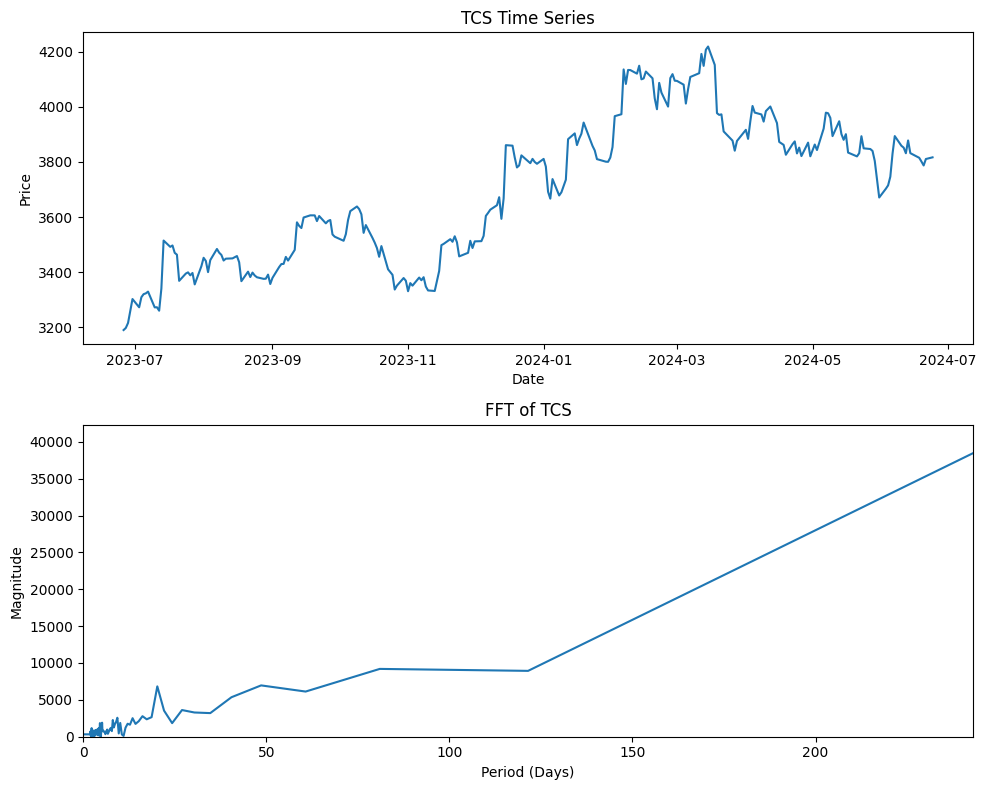

In [88]:
# simple visualisation of price
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'])
plt.title('TCS Time Series')
plt.xlabel('Date')
plt.ylabel('Price')

# frequency domain representation
plt.subplot(2, 1, 2)
plt.plot(periods, magnitude)
plt.title('FFT of TCS')
plt.xlabel('Period (Days)')
plt.ylabel('Magnitude')
plt.xlim(0, max(periods[1:]))  # limiting x-axis to view significant periods (ignore large periods)
plt.ylim(0, max(magnitude[1:]) * 1.1)  # ignore the zero frequency component

plt.tight_layout()
plt.show()

In [89]:
#now we can start to recover the signal back
recovered = np.fft.ifft(fft_result)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


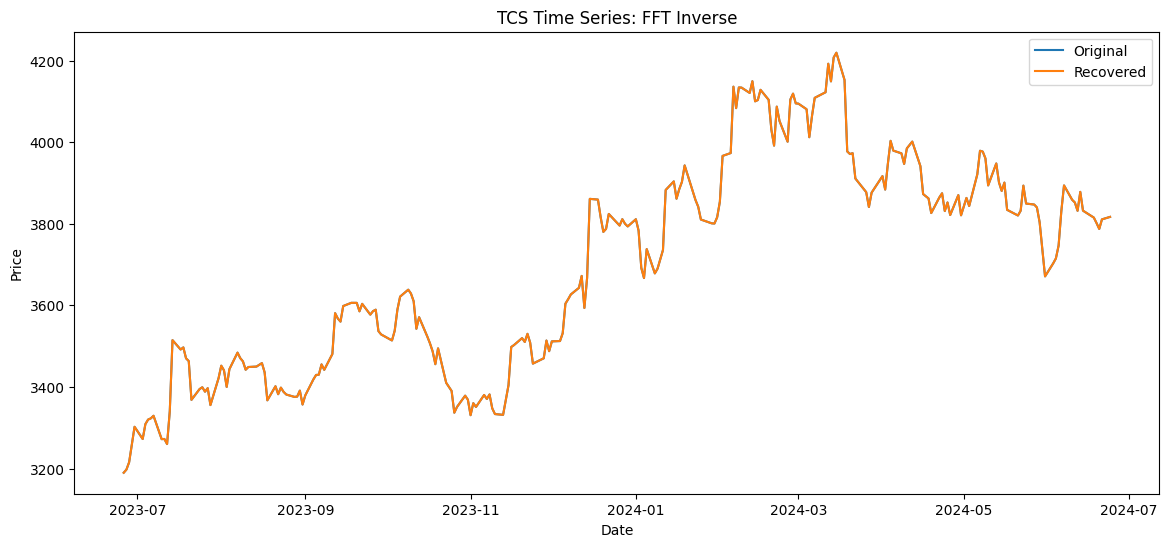

In [90]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Original')
plt.plot(df.index, recovered, label='Recovered')
plt.title('TCS Time Series: FFT Inverse')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [91]:
dominant_periods = pd.Series(periods, index = magnitude).nlargest(25)
dominant_periods.to_frame('Period (Days)')

,Period (Days)
896730.600342,inf
38456.073448,243.000000
8932.108865,121.500000
9198.252761,81.000000
6126.293951,60.750000
6961.296907,48.600000
5356.298364,40.500000
3202.990779,34.714286
3286.434791,30.375000
3617.588371,27.000000


In [92]:
#recovering the original time series with just the top 25 dominant periods
top_periods = dominant_periods.index
top_fft_result = fft_result.copy()
top_fft_result[np.abs(frequencies) > 1 / top_periods.min()] = 0
top_recovered = np.fft.ifft(top_fft_result)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


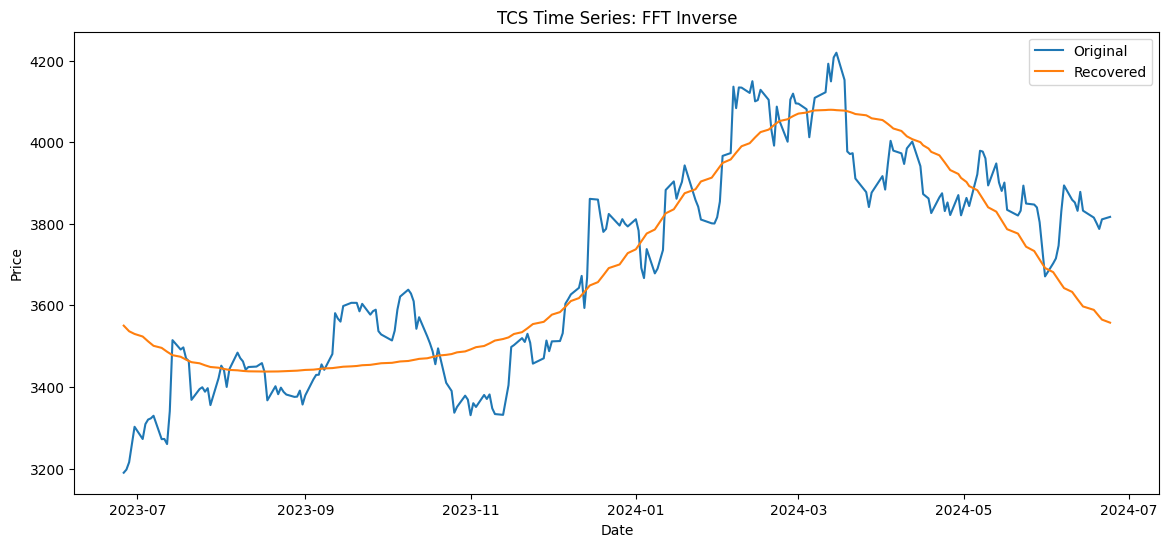

In [93]:
plt.figure(figsize = (14, 6))
plt.plot(df.index, df['Close'], label = 'Original')
plt.plot(df.index, top_recovered, label = 'Recovered')
plt.title('TCS Time Series: FFT Inverse')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()